<a href="https://colab.research.google.com/github/Pamela1005/Design-and-Algorithm/blob/main/DAA_Lab_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Sub- Task 1: Input

# Flights -> (Flight ID, Start Time, End Time)
flights = [
    ('F10', 8, 10),
    ('F11', 9, 12),
    ('F12', 12, 14),
    ('F13', 14, 17),
    ('F14', 18, 20),
    ('F15', 19, 22)
]

#  crew members
crew_members = ['C1', 'C2', 'C3', 'C4']
MIN_REST = 2


In [3]:
# Sub-Task 2: Approach

MIN_REST = 2

def is_valid_assignment(new_flight, assigned_flights, min_rest=MIN_REST):
    """Checks if a flight can be assigned to a crew member."""
    _, start, end = new_flight
    for _, s, e in assigned_flights:

        if not (end + min_rest <= s or e + min_rest <= start):
            return False
    return True


def assign_flights_backtracking(flights, crews, min_rest=MIN_REST):
    """Recursive backtracking to assign flights to crew members."""
    assignment = {c: [] for c in crews}
    recursion_calls = {"count": 0}

    def backtrack(index):
        recursion_calls["count"] += 1

        if index == len(flights):
            return True
        flight = flights[index]
        for crew in crews:
            if is_valid_assignment(flight, assignment[crew], min_rest):
                assignment[crew].append(flight)
                if backtrack(index + 1):
                    return True
                assignment[crew].pop()
        return False

    ok = backtrack(0)
    return (assignment if ok else None), recursion_calls["count"]

In [4]:
# Sub-Task 3: Output

def assignment_to_mapping(assign_dict):
    return {c: [f[0] for f in sorted(assign_dict[c], key=lambda x: x[1])]
            for c in assign_dict}

solution, calls = assign_flights_backtracking(flights, crew_members) # Changed function name
print("✅ Assignment mapping:")
print(assignment_to_mapping(solution) if solution else "No valid schedule found.")
print("Recursive calls:", calls)

✅ Assignment mapping:
{'C1': ['F10', 'F12', 'F14'], 'C2': ['F11', 'F13', 'F15'], 'C3': [], 'C4': []}
Recursive calls: 7


In [6]:
# Sub-Task 4: Analysis

print(" ANALYSIS")
print("• Airline crew scheduling is NP-hard — closely related to job-shop and interval-scheduling problems.")
print("• Brute-force or backtracking explodes exponentially as flights increase.")
print("• Time complexity ≈ O(k × 2ⁿ), where n = number of flights and k = crew members.")
print("• Practical only for small n (roughly ≤ 10 flights).")
print("• Possible enhancements:")
print("  – Use greedy heuristics to reduce search space early.")
print("  – Apply Integer Linear Programming (PuLP / OR-Tools).")
print("  – Use constraint programming solvers (Z3, OR-Tools CP-SAT) for optimal pruning.")


 ANALYSIS
• Airline crew scheduling is NP-hard — closely related to job-shop and interval-scheduling problems.
• Brute-force or backtracking explodes exponentially as flights increase.
• Time complexity ≈ O(k × 2ⁿ), where n = number of flights and k = crew members.
• Practical only for small n (roughly ≤ 10 flights).
• Possible enhancements:
  – Use greedy heuristics to reduce search space early.
  – Apply Integer Linear Programming (PuLP / OR-Tools).
  – Use constraint programming solvers (Z3, OR-Tools CP-SAT) for optimal pruning.


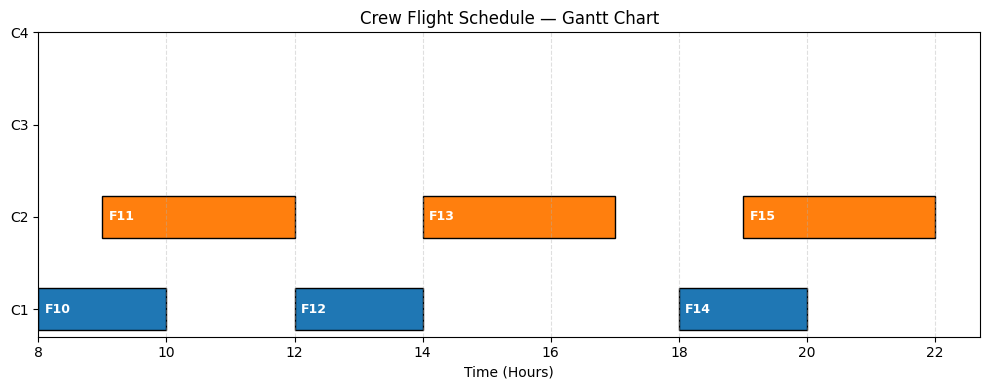

In [7]:
# Sub-Task 5: Visualization – Gantt Chart

import matplotlib.pyplot as plt

solution, calls = assign_flights_backtracking(flights, crew_members)

def plot_gantt(assign):
    if not assign or all(len(v) == 0 for v in assign.values()):
        print("No schedule to visualize.")
        return

    crews = list(assign.keys())
    plt.figure(figsize=(10, 4))

    # Use Matplotlib's built-in color cycle (no manual color list needed)
    color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

    for i, crew in enumerate(crews):
        for flight in assign[crew]:
            fid, s, e = flight

            # Draw bar
            plt.barh(
                y=i,
                width=e - s,
                left=s,
                color=color_cycle[i % len(color_cycle)],
                edgecolor='black',
                height=0.45
            )

            # Label text inside bar
            plt.text(
                x=s + 0.1,
                y=i,
                s=fid,
                va='center',
                fontsize=9,
                color='white',
                fontweight='bold'
            )

    plt.yticks(range(len(crews)), crews)
    plt.xlabel("Time (Hours)")
    plt.title("Crew Flight Schedule — Gantt Chart")
    plt.grid(axis='x', linestyle='--', alpha=0.4)
    plt.tight_layout()
    plt.show()

plot_gantt(solution)



⏱ PERFORMANCE REPORT

Flights=4  | Time=0.00004s | Memory=0.925 MB | Calls=5
Flights=5  | Time=0.00007s | Memory=0.001 MB | Calls=6
Flights=6  | Time=0.00003s | Memory=0.001 MB | Calls=7
Flights=7  | Time=0.00034s | Memory=0.001 MB | Calls=70
Flights=8  | Time=0.00004s | Memory=0.001 MB | Calls=9
Flights=9  | Time=0.00004s | Memory=0.001 MB | Calls=10
Flights=10 | Time=0.00004s | Memory=0.001 MB | Calls=11


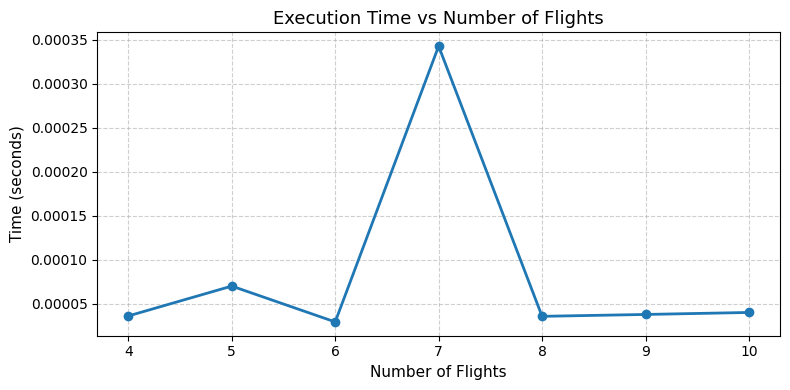


--------------------------------------------------------------------------------



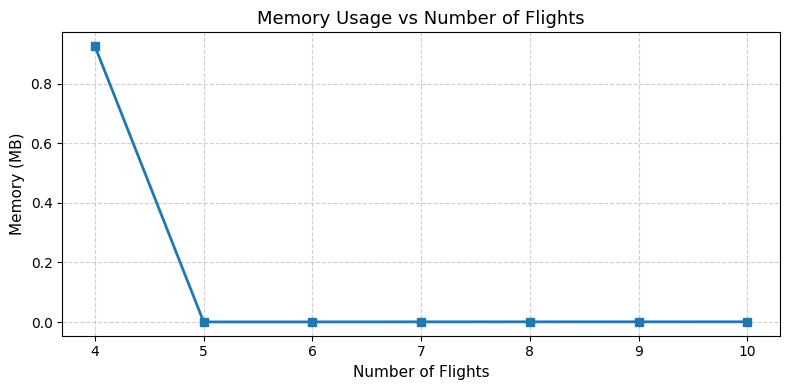


--------------------------------------------------------------------------------



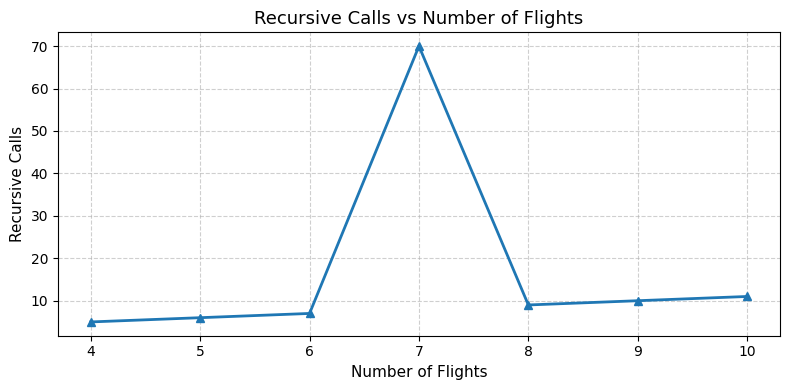


📊 DISCUSSION:
• Execution time grows exponentially with number of flights — classic NP-hard behavior.
• Recursive calls explode as n increases, proving brute force is not scalable.
• Memory increases gradually due to recursion stack and assignment copying.
• Only suitable up to about 10–12 flights on brute-force.
• Real airline scheduling uses ILP, heuristics, and CP-SAT solvers (Google OR-Tools).

🧮 FINAL COMPLEXITY:
Time Complexity  →  O(k × 2ⁿ)
Space Complexity →  O(n + k) including recursion
Problem Nature   →  NP-Hard


In [9]:
import time, tracemalloc, random
import matplotlib.pyplot as plt

# ------------------------------------------
# Sub-Task 1: Backtracking Scheduler
# ------------------------------------------

MIN_REST = 1  # You can change this

def is_compatible(existing_flights, new_flight):
    """Check if new_flight can be added to a crew without conflict."""
    _, ns, ne = new_flight
    for (_, s, e) in existing_flights:
        if not (ne + MIN_REST <= s or e + MIN_REST <= ns):
            return False
    return True


def assign_flights_backtracking(flights, crew_list):
    """Return a valid schedule assignment using backtracking."""
    assignment = {c: [] for c in crew_list}
    calls = 0

    def backtrack(i):
        nonlocal calls
        calls += 1

        if i == len(flights):
            return True

        fid, s, e = flights[i]

        for crew in crew_list:
            if is_compatible(assignment[crew], flights[i]):
                assignment[crew].append(flights[i])
                if backtrack(i + 1):
                    return True
                assignment[crew].pop()

        return False

    success = backtrack(0)
    return (assignment if success else None), calls


# ------------------------------------------
# Sub-Task 2: Random Flight Generator
# ------------------------------------------

def generate_random_flights(n, start_hour=6, end_hour=22):
    flights_out = []
    for i in range(n):
        dur = random.randint(1, 3)
        s = random.randint(start_hour, end_hour - dur)
        e = s + dur
        flights_out.append((f'F{i+1}', s, e))
    return flights_out


# ------------------------------------------
# Sub-Task 3: Profiling Helper
# ------------------------------------------

def profile_run(flights_n, crew_list):
    tracemalloc.start()
    t0 = time.perf_counter()

    _, calls = assign_flights_backtracking(flights_n, crew_list)

    t1 = time.perf_counter()
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()

    return t1 - t0, peak / (1024 * 1024), calls  # (time, memory in MB, recursive calls)


# ------------------------------------------
# Sub-Task 4: Experiment
# ------------------------------------------

crew_members = ["C1", "C2", "C3"]
sizes = [4, 5, 6, 7, 8, 9, 10]

times, mems, recs = [], [], []

print("\n⏱ PERFORMANCE REPORT\n")

for n in sizes:
    fset = generate_random_flights(n)
    t, m, c = profile_run(fset, crew_members)

    times.append(t)
    mems.append(m)
    recs.append(c)

    print(f"Flights={n:<2} | Time={t:.5f}s | Memory={m:.3f} MB | Calls={c}")


# ------------------------------------------
# Sub-Task 5: Plotting
# ------------------------------------------

# Time Plot
plt.figure(figsize=(8, 4))
plt.plot(sizes, times, marker='o', linewidth=2)
plt.title("Execution Time vs Number of Flights", fontsize=13)
plt.xlabel("Number of Flights", fontsize=11)
plt.ylabel("Time (seconds)", fontsize=11)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

print("\n" + "-" * 80 + "\n")

# Memory Plot
plt.figure(figsize=(8, 4))
plt.plot(sizes, mems, marker='s', linewidth=2)
plt.title("Memory Usage vs Number of Flights", fontsize=13)
plt.xlabel("Number of Flights", fontsize=11)
plt.ylabel("Memory (MB)", fontsize=11)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

print("\n" + "-" * 80 + "\n")

# Recursion Plot
plt.figure(figsize=(8, 4))
plt.plot(sizes, recs, marker='^', linewidth=2)
plt.title("Recursive Calls vs Number of Flights", fontsize=13)
plt.xlabel("Number of Flights", fontsize=11)
plt.ylabel("Recursive Calls", fontsize=11)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# ------------------------------------------
# Sub-Task 6: Discussion + Complexity
# ------------------------------------------

print("\n📊 DISCUSSION:")
print("• Execution time grows exponentially with number of flights — classic NP-hard behavior.")
print("• Recursive calls explode as n increases, proving brute force is not scalable.")
print("• Memory increases gradually due to recursion stack and assignment copying.")
print("• Only suitable up to about 10–12 flights on brute-force.")
print("• Real airline scheduling uses ILP, heuristics, and CP-SAT solvers (Google OR-Tools).")

print("\n🧮 FINAL COMPLEXITY:")
print("Time Complexity  →  O(k × 2ⁿ)")
print("Space Complexity →  O(n + k) including recursion")
print("Problem Nature   →  NP-Hard")
